### `cenpy` Practice
After discussions with a colleague, reading the Census developers Slack, and some other light reading, it appears that using `cenpy` to grab data and produce visualizations may be the best way (that I know of) to extract and use Milwaukee-related Census data. I am using this notebook to play around with its functionality before starting to develop code & requests.

In [1]:
# Import statements
import cenpy as cp
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy.stats as stats
import sys
import os
#import osmnx
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Method to load an API +key
def load_api_key(file="census_api.txt"):
    try:
        with open(file, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % path)
        
key = load_api_key()

Okay, it looks like we have the Census data necessary for using `cenpy` are installed. Let's see what packages are available through `cenpy`.

Looks like the main objects we will use are:

* `base`
* `explorer`
* `geoparser`
* `remote`
* `tiger`
* `tools`

Let's take a look at which packages are available within these attributes

In [3]:
print("***cp.base attributes***\n")
print(dir(cp.base))

***cp.base attributes***

['Connection', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [4]:
print("***cp.explorer attributes***\n")
print(dir(cp.explorer))

***cp.explorer attributes***

['APIs', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_delist', '_parse_results_table_from_response', 'available', 'diter', 'explain', 'fips_table', 'fp', 'os', 'pd', 'r', 'raw_APIs', 'six', 'unicode']


In [5]:
print("***cp.geoparser attributes***\n")
print(dir(cp.geoparser))

***cp.geoparser attributes***

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_get_polygon_type', '_is_cw', '_parse_clockwise_sequence', 'convert_geometries', 'esriGeometryPoint', 'esriGeometryPolyLine', 'esriGeometryPolygon', 'esriMultiPoint', 'fix_rings', 'np', 'parse_polygon_to_pysal', 'parse_polygon_to_shapely', 'pd']


In [6]:
print("***cp.remote attributes***\n")
print(dir(cp.remote))

***cp.remote attributes***

['APIConnection', 'JSONDecodeError', 'PY3', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'exp', 'iteritems', 'math', 'np', 'pd', 'r', 'tig', 'unicode']


In [7]:
print("***cp.tiger attributes***\n")
print(dir(cp.tiger))

***cp.tiger attributes***

['ESRILayer', 'FTPConnection', 'TigerConnection', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_basequery', '_baseurl', '_bcs', '_jget', '_pcs', 'available', 'copy', 'diter', 'gpsr', 'pd', 'r']


In [8]:
print("***cp.tools attributes***\n")
print(dir(cp.tools))

***cp.tools attributes***

['HTTPError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_ft', '_load_sitekey', '_state_fipscodes', 'county_to_block', 'gencounty_to_block', 'genstate_to_block', 'genstate_to_blockgroup', 'genstate_to_tract', 'national_to_block', 'national_to_blockgroup', 'national_to_tract', 'os', 'pd', 'set_sitekey', 'state_to_block', 'state_to_blockgroup', 'state_to_tract', 'time', 'tqdm', 'warn']


With the exception, of `cenpy.base`, it looks like the main attributes we will use are the ones listed above as suspected. We are missing `products.py` though, which is problematic. We are going to try to get some Milwaukee data now.

In [9]:
help(cp.remote.APIConnection)

Help on class APIConnection in module cenpy.remote:

class APIConnection(builtins.object)
 |  APIConnection(api_name=None, apikey='')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_name=None, apikey='')
 |      Constructor for a Connection object
 |      
 |      Parameters
 |      ============
 |      api_name : shortcode identifying which api to connect to
 |      
 |      Returns
 |      ========
 |      
 |      a Cenpy Connection object
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  explain(self, *args, **kwargs)
 |      Explain a column or list of columns.
 |      
 |      Parameters
 |      ============
 |      *args : list of names of columns in the variables dataframe that require
 |              explanation"
 |      verbose : boolean denoting whether to grab both "label" and "concept"
 |              from the variable dataframe.
 |      
 |      Returns
 |      ==========
 |      dictionary of explanatory texts about variables inputted.
 |  
 |  query

Create a connection to the 2019 CBP API

In [10]:
cbp_conn = cp.remote.APIConnection("CBP2019", apikey=key)

Create a table of variables from 2019 CBP

In [11]:
cbp_conn.variables

,label,concept,predicateType,group,limit,predicateOnly,attributes,required,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,NaN,NaN,NaN
EMP_N,Noise range for number of employees,"All Sectors: County Business Patterns, includi...",int,CB1900CBP,0,NaN,EMP_N_F,NaN,NaN
STATE,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
PAYQTR1_N,Noise range for first-quarter payroll,"All Sectors: County Business Patterns, includi...",int,CB1900CBP,0,NaN,PAYQTR1_N_F,NaN,NaN
CSA,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
GEOCOMP,GEO_ID Component,NaN,string,N/A,0,NaN,NaN,default displayed,NaN
NATION,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
LFO,Legal form of organization code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,LFO_LABEL,default displayed,"{'item': {'001': 'All establishments', '901': ..."


Show the required predicates by filtering the variables DataFrame by the required field. If required fields are not entered into a query, the query **will fail** if these queries are not passed as keyword arguments. They don't have to specify a a signle value, though, so they can be left as a wild card (use `*`).

In [12]:
cbp_conn.variables[~ cbp_conn.variables.required.isnull()]

,label,concept,predicateType,group,limit,predicateOnly,attributes,required,values
GEOCOMP,GEO_ID Component,NaN,string,N/A,0,NaN,NaN,default displayed,NaN
LFO,Legal form of organization code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,LFO_LABEL,default displayed,"{'item': {'001': 'All establishments', '901': ..."
NAICS2017,2017 NAICS code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,"NAICS2017_F,NAICS2017_LABEL,NAICS2017_F",default displayed,"{'item': {'00': 'Total for all sectors', '0000..."
EMPSZES,Employment size of establishments code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,EMPSZES_LABEL,default displayed,"{'item': {'001': 'All establishments', '204': ..."


Geographies are shown within a given hierarchy. The only geography is the `fips` geography.

In [13]:
cbp_conn.geographies.keys()

dict_keys(['fips'])

Print the geography levels available for 2019 CBP:

In [14]:
cbp_conn.geographies["fips"]

,name,geoLevelDisplay,referenceDate,requires,wildcard,optionalWithWCFor
0,us,010,2017-01-01,NaN,NaN,NaN
1,state,040,2017-01-01,NaN,NaN,NaN
2,county,050,2017-01-01,[state],[state],state
3,metropolitan statistical area/micropolitan sta...,310,2017-01-01,NaN,NaN,NaN
4,combined statistical area,330,2017-01-01,NaN,NaN,NaN
5,congressional district,500,2017-01-01,[state],[state],state
6,zip code,861,2017-01-01,NaN,NaN,NaN


Try to get ZIP code level data from the new API connection opened in this notebook.

*Note: Idk if ZBP is available through `cenpy` at the moment.

Try getting county-level data for Wisconsin.

In [15]:
wi_cbp_19 = cbp_conn.query(cols=["NAME", "NAICS2017", "NAICS2017_LABEL",
                                 "EMP", "ESTAB", "PAYANN", "PAYQTR1"], geo_unit="county:*", geo_filter={'state': '55'})

In [16]:
wi_cbp_19

,NAME,NAICS2017,NAICS2017_LABEL,EMP,ESTAB,PAYANN,PAYQTR1,state,county
0,"Iron County, Wisconsin",00,Total for all sectors,1380,191,41498,8794,55,051
1,"Iron County, Wisconsin",11,"Agriculture, forestry, fishing and hunting",15,6,404,99,55,051
2,"Iron County, Wisconsin",113,Forestry and logging,15,6,404,99,55,051
3,"Iron County, Wisconsin",1133,Logging,15,6,404,99,55,051
4,"Iron County, Wisconsin",11331,Logging,15,6,404,99,55,051
...,...,...,...,...,...,...,...,...,...
30212,"Kenosha County, Wisconsin",81391,Business associations,6,3,257,59,55,059
30213,"Kenosha County, Wisconsin",813910,Business associations,6,3,257,59,55,059
30214,"Kenosha County, Wisconsin",81393,Labor unions and similar labor organizations,43,6,397,99,55,059
30215,"Kenosha County, Wisconsin",813930,Labor unions and similar labor organizations,43,6,397,99,55,059


We need to grab geodata at the county level for Wisconsin.

In [17]:
cbp_conn.set_mapservice("State_County")

How many layers are available through the Census's MapService?

In [18]:
len(cbp_conn.mapservice.layers)

71

That is a lot of layers, We could check what the interface looks like by retrieving URLs of most objects:

In [19]:
cbp_conn.mapservice._baseurl

'http://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/State_County/MapServer'

Pull the Wisconsin counties layer from our mapservice connection:

In [20]:
wi_cty_geo = cbp_conn.mapservice.query(layer=1, where="STATE = 55")
# view columns
wi_cty_geo.head()

/Users/edebroux/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,MTFCC,OID,GEOID,STATE,COUNTY,COUNTYNS,BASENAME,NAME,LSADC,FUNCSTAT,COUNTYCC,AREALAND,AREAWATER,OBJECTID,CENTLAT,CENTLON,INTPTLAT,INTPTLON,geometry
0,G4020,27590451104831,55111,55,111,01581115,Sauk,Sauk County,06,A,H1,2153686013,45692969,17,+43.4265204,-089.9482217,+43.4280010,-089.9433184,"POLYGON ((-10000753.142 5343368.137, -10000849..."
1,G4020,27590235652898,55093,55,093,01581107,Pierce,Pierce County,06,A,H1,1486700521,48452323,146,+44.7194087,-092.4223648,+44.7253365,-092.4262793,"POLYGON ((-10283128.723 5599869.584, -10282428..."
2,G4020,27590695004695,55063,55,063,01581091,La Crosse,La Crosse County,06,A,H1,1170175008,73150469,156,+43.9064775,-091.1151639,+43.9082222,-091.1117584,"POLYGON ((-10153657.364 5475807.618, -10153567..."
3,G4020,27590240238595,55033,55,033,01581076,Dunn,Dunn County,06,A,H1,2201902840,35572613,162,+44.9462773,-091.8963779,+44.9477513,-091.8976451,"POLYGON ((-10231552.287 5654398.059, -10231237..."
4,G4020,27590453995255,55053,55,053,01581086,Jackson,Jackson County,06,A,H1,2558687755,32538316,172,+44.3191910,-090.8049791,+44.3245897,-090.7995104,"POLYGON ((-10118138.877 5489995.828, -10118218..."


Beware of that depreciation warning...

Let's combine this CBP data from the 2019 CBP API query & the MapService query:

In [21]:
wi_cbp_geo = pd.merge(wi_cbp_19, wi_cty_geo, left_on="county", right_on="COUNTY")
# Check the first 5 rows of the new DataFrame
wi_cbp_geo.head()

,NAME_x,NAICS2017,NAICS2017_LABEL,EMP,ESTAB,PAYANN,PAYQTR1,state,county,MTFCC,...,FUNCSTAT,COUNTYCC,AREALAND,AREAWATER,OBJECTID,CENTLAT,CENTLON,INTPTLAT,INTPTLON,geometry
0,"Iron County, Wisconsin",00,Total for all sectors,1380,191,41498,8794,55,051,G4020,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
1,"Iron County, Wisconsin",11,"Agriculture, forestry, fishing and hunting",15,6,404,99,55,051,G4020,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
2,"Iron County, Wisconsin",113,Forestry and logging,15,6,404,99,55,051,G4020,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
3,"Iron County, Wisconsin",1133,Logging,15,6,404,99,55,051,G4020,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
4,"Iron County, Wisconsin",11331,Logging,15,6,404,99,55,051,G4020,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."


In [22]:
wi_cbp_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30217 entries, 0 to 30216
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   NAME_x           30217 non-null  object  
 1   NAICS2017        30217 non-null  object  
 2   NAICS2017_LABEL  30217 non-null  object  
 3   EMP              30217 non-null  object  
 4   ESTAB            30217 non-null  object  
 5   PAYANN           30217 non-null  object  
 6   PAYQTR1          30217 non-null  object  
 7   state            30217 non-null  object  
 8   county           30217 non-null  object  
 9   MTFCC            30217 non-null  object  
 10  OID              30217 non-null  object  
 11  GEOID            30217 non-null  object  
 12  STATE            30217 non-null  object  
 13  COUNTY           30217 non-null  object  
 14  COUNTYNS         30217 non-null  object  
 15  BASENAME         30217 non-null  object  
 16  NAME_y           30217 non-null  object 

Let's try to make a Wisconsin CBP map

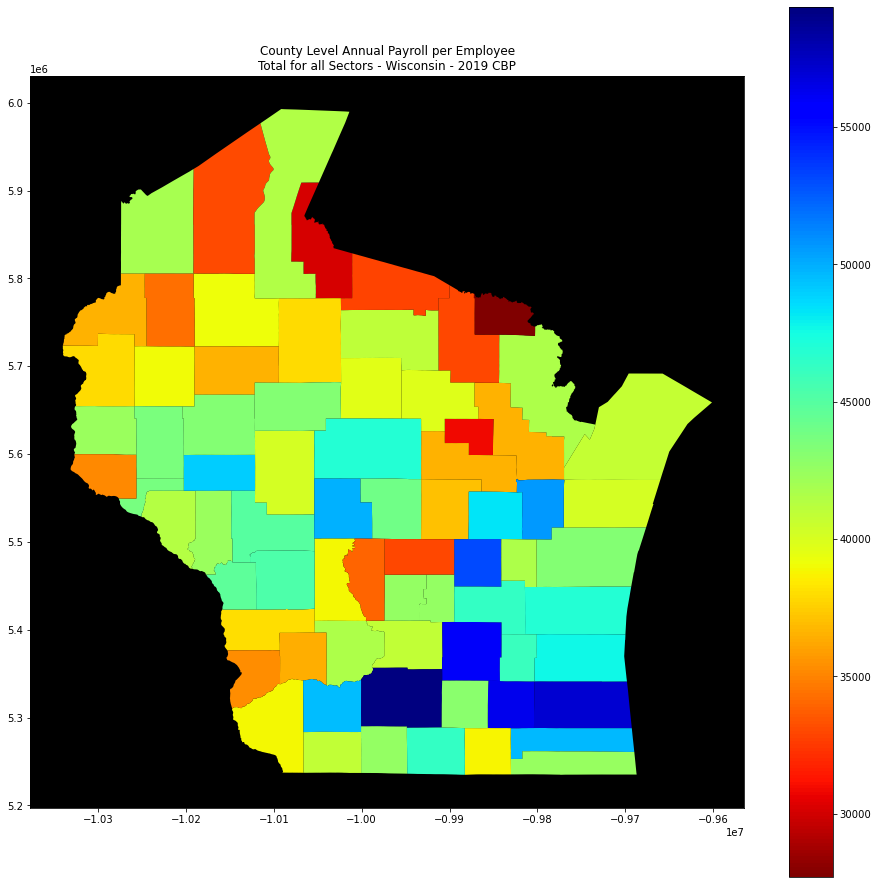

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
wi_data = gpd.GeoDataFrame(wi_cbp_geo[["NAME_x", "NAICS2017", "EMP", "ESTAB", "PAYANN", "PAYQTR1", "geometry"]])
wi_data["EMP"] = wi_data["EMP"].astype(np.int64); wi_data["PAYANN"] = wi_data["PAYANN"].astype(np.int64)
wi_data["AP_PER_EMP"] = wi_data["PAYANN"] / wi_data["EMP"] * 1000.
wi_data["AP_PER_EMP"] = wi_data["AP_PER_EMP"].round(decimals=0)
wi_data[wi_data.NAICS2017=="00"].plot(ax=ax, legend=True, column = "AP_PER_EMP", cmap="jet_r")
ax.set_title("County Level Annual Payroll per Employee\nTotal for all Sectors - Wisconsin - 2019 CBP")
ax.set_facecolor("k")
plt.show()

In [24]:
# Set initial MKE ZIP Code object
mke_zbp = pd.DataFrame()
# Compile ZIP Code list for MKE
zc_list = ["53201", "53202", "53203", "53204", "53205", "53206", "53207",
          "53208", "53209", "53210", "53211", "53212", "53213", "53214",
          "53215", "53216", "53217", "53218", "53219", "53220", "53221",
          "53222", "53223", "53224", "53225", "53226", "53227", "53228",
          "53233", "53234", "53237", "53295"]
# Iterate through the Milwaukee zipcodes
for zc in zc_list:
    print(f"Loading ZBP data for Milwaukee ZIP code {zc}.")
    zreq = cbp_conn.query(cols=["NAME", "YEAR", "NAICS2017", "NAICS2017_LABEL",
                                "EMP", "ESTAB", "PAYANN", "PAYQTR1"], geo_unit=f"zip code:{zc}")
    mke_zbp = pd.concat([mke_zbp, zreq])
# View the MKE ZBP DataFrame
mke_zbp.head()

Loading ZBP data for Milwaukee ZIP code 53201.
Loading ZBP data for Milwaukee ZIP code 53202.
Loading ZBP data for Milwaukee ZIP code 53203.
Loading ZBP data for Milwaukee ZIP code 53204.
Loading ZBP data for Milwaukee ZIP code 53205.
Loading ZBP data for Milwaukee ZIP code 53206.
Loading ZBP data for Milwaukee ZIP code 53207.
Loading ZBP data for Milwaukee ZIP code 53208.
Loading ZBP data for Milwaukee ZIP code 53209.
Loading ZBP data for Milwaukee ZIP code 53210.
Loading ZBP data for Milwaukee ZIP code 53211.
Loading ZBP data for Milwaukee ZIP code 53212.
Loading ZBP data for Milwaukee ZIP code 53213.
Loading ZBP data for Milwaukee ZIP code 53214.
Loading ZBP data for Milwaukee ZIP code 53215.
Loading ZBP data for Milwaukee ZIP code 53216.
Loading ZBP data for Milwaukee ZIP code 53217.
Loading ZBP data for Milwaukee ZIP code 53218.
Loading ZBP data for Milwaukee ZIP code 53219.
Loading ZBP data for Milwaukee ZIP code 53220.
Loading ZBP data for Milwaukee ZIP code 53221.
Loading ZBP d

,NAME,YEAR,NAICS2017,NAICS2017_LABEL,EMP,ESTAB,PAYANN,PAYQTR1,zip code
0,"ZIP 53201 (Milwaukee, WI)",2019,00,Total for all sectors,2500,35,174814,51619,53201
1,"ZIP 53201 (Milwaukee, WI)",2019,22,Utilities,0,3,0,0,53201
2,"ZIP 53201 (Milwaukee, WI)",2019,221,Utilities,0,3,0,0,53201
3,"ZIP 53201 (Milwaukee, WI)",2019,31-33,Manufacturing,0,3,0,0,53201
4,"ZIP 53201 (Milwaukee, WI)",2019,52,Finance and insurance,0,3,0,0,53201


In [25]:
# get the ZIP Code to ZCTA cross walk
mke_zbp["zcta"] = mke_zbp["zip code"]
mke_zbp["zcta"][mke_zbp["zip code"] == "53201"] = "53204"
mke_zbp["zcta"][mke_zbp["zip code"] == "53234"] = "53215"
mke_zbp["zcta"][mke_zbp["zip code"] == "53237"] = "53207"
mke_zbp["EMP"] = mke_zbp.EMP.astype(np.int64)
mke_zbp["ESTAB"] = mke_zbp.ESTAB.astype(np.int64)
mke_zbp["PAYANN"] = mke_zbp.PAYANN.astype(np.int64)
mke_zbp["PAYQTR1"] = mke_zbp.PAYQTR1.astype(np.int64)
# View the new DataFrame
mke_zbp.head()

,NAME,YEAR,NAICS2017,NAICS2017_LABEL,EMP,ESTAB,PAYANN,PAYQTR1,zip code,zcta
0,"ZIP 53201 (Milwaukee, WI)",2019,00,Total for all sectors,2500,35,174814,51619,53201,53204
1,"ZIP 53201 (Milwaukee, WI)",2019,22,Utilities,0,3,0,0,53201,53204
2,"ZIP 53201 (Milwaukee, WI)",2019,221,Utilities,0,3,0,0,53201,53204
3,"ZIP 53201 (Milwaukee, WI)",2019,31-33,Manufacturing,0,3,0,0,53201,53204
4,"ZIP 53201 (Milwaukee, WI)",2019,52,Finance and insurance,0,3,0,0,53201,53204


In [26]:
mke_zbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             6345 non-null   object
 1   YEAR             6345 non-null   object
 2   NAICS2017        6345 non-null   object
 3   NAICS2017_LABEL  6345 non-null   object
 4   EMP              6345 non-null   int64 
 5   ESTAB            6345 non-null   int64 
 6   PAYANN           6345 non-null   int64 
 7   PAYQTR1          6345 non-null   int64 
 8   zip code         6345 non-null   object
 9   zcta             6345 non-null   object
dtypes: int64(4), object(6)
memory usage: 545.3+ KB


In [27]:
mke_zbp_zcta = mke_zbp[["YEAR",
                        "NAICS2017",
                        "NAICS2017_LABEL",
                        "EMP",
                        "ESTAB",
                        "PAYANN",
                        "PAYQTR1",
                        "zcta"]].groupby(["YEAR",
                                          "NAICS2017",
                                          "NAICS2017_LABEL",
                                          "zcta"]).sum().sort_values(by=["zcta",
                                                                         "NAICS2017"], ascending=True).reset_index(drop=False)
mke_zbp_zcta

,YEAR,NAICS2017,NAICS2017_LABEL,zcta,EMP,ESTAB,PAYANN,PAYQTR1
0,2019,00,Total for all sectors,53202,59820,1875,5230367,1542102
1,2019,23,Construction,53202,0,41,0,0
2,2019,236,Construction of buildings,53202,0,22,0,0
3,2019,2361,Residential building construction,53202,0,9,0,0
4,2019,23611,Residential building construction,53202,0,9,0,0
...,...,...,...,...,...,...,...,...
6325,2019,81331,Social advocacy organizations,53233,0,3,0,0
6326,2019,8139,"Business, professional, labor, political, and ...",53233,0,5,0,0
6327,2019,81393,Labor unions and similar labor organizations,53233,0,3,0,0
6328,2019,813930,Labor unions and similar labor organizations,53233,0,3,0,0


In [28]:
help(cp.remote.APIConnection)

Help on class APIConnection in module cenpy.remote:

class APIConnection(builtins.object)
 |  APIConnection(api_name=None, apikey='')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_name=None, apikey='')
 |      Constructor for a Connection object
 |      
 |      Parameters
 |      ============
 |      api_name : shortcode identifying which api to connect to
 |      
 |      Returns
 |      ========
 |      
 |      a Cenpy Connection object
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  explain(self, *args, **kwargs)
 |      Explain a column or list of columns.
 |      
 |      Parameters
 |      ============
 |      *args : list of names of columns in the variables dataframe that require
 |              explanation"
 |      verbose : boolean denoting whether to grab both "label" and "concept"
 |              from the variable dataframe.
 |      
 |      Returns
 |      ==========
 |      dictionary of explanatory texts about variables inputted.
 |  
 |  query

In [29]:
# Set the connection to the 2010 Decennial
zcta_geo_conn = cp.remote.APIConnection("DECENNIALSF12010", apikey=key)
zcta_geo_conn.set_mapservice('tigerWMS_Census2010')
zcta_geo_conn.mapservice.layers[8].variables

,name,type,alias,length,domain
0,MTFCC,esriFieldTypeString,MTFCC,5.0,None
1,OID,esriFieldTypeString,OID,22.0,None
2,GEOID,esriFieldTypeString,GEOID,5.0,None
3,BASENAME,esriFieldTypeString,BASENAME,100.0,None
4,NAME,esriFieldTypeString,NAME,100.0,None
5,LSADC,esriFieldTypeString,LSADC,2.0,None
6,FUNCSTAT,esriFieldTypeString,FUNCSTAT,1.0,None
7,AREALAND,esriFieldTypeDouble,AREALAND,NaN,None
8,AREAWATER,esriFieldTypeDouble,AREAWATER,NaN,None
9,STGEOMETRY,esriFieldTypeGeometry,STGEOMETRY,NaN,None


In [30]:
mke_zctas = mke_zbp_zcta.zcta.unique()

In [31]:
# Get the ZCTA geographies
zcta_data = pd.DataFrame()
# Compile ZCTA shape files
for zcta in mke_zctas:
    # Show which ZCTA's shapefile is being pulled
    print(f"Requesting data for ZCTA: {zcta}.")
    # Put in request for ZCTA
    geo_req = zcta_geo_conn.mapservice.query(layer=8, where=f"ZCTA5 = {zcta}")
    # Concatenate the returned DataFrame to our overall dataset
    zcta_data = pd.concat([zcta_data, geo_req], axis=0, ignore_index=True)

Requesting data for ZCTA: 53202.


/Users/edebroux/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Requesting data for ZCTA: 53203.
Requesting data for ZCTA: 53204.
Requesting data for ZCTA: 53205.
Requesting data for ZCTA: 53206.
Requesting data for ZCTA: 53207.
Requesting data for ZCTA: 53208.
Requesting data for ZCTA: 53209.
Requesting data for ZCTA: 53210.
Requesting data for ZCTA: 53211.
Requesting data for ZCTA: 53212.
Requesting data for ZCTA: 53213.
Requesting data for ZCTA: 53214.
Requesting data for ZCTA: 53215.
Requesting data for ZCTA: 53216.
Requesting data for ZCTA: 53217.
Requesting data for ZCTA: 53218.
Requesting data for ZCTA: 53219.
Requesting data for ZCTA: 53220.
Requesting data for ZCTA: 53221.
Requesting data for ZCTA: 53222.
Requesting data for ZCTA: 53223.
Requesting data for ZCTA: 53224.
Requesting data for ZCTA: 53225.
Requesting data for ZCTA: 53226.
Requesting data for ZCTA: 53227.
Requesting data for ZCTA: 53228.
Requesting data for ZCTA: 53233.
Requesting data for ZCTA: 53295.


In [32]:
zcta_data

,MTFCC,OID,GEOID,BASENAME,NAME,LSADC,FUNCSTAT,AREALAND,AREAWATER,CENTLAT,CENTLON,INTPTLAT,INTPTLON,ZCTA5CC,ZCTA5,HU100,POP100,OBJECTID,geometry
0,G6350,221404258298376,53202,53202,ZCTA5 53202,Z5,S,5470476,2656308,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."
1,G6350,221404258298406,53203,53203,ZCTA5 53203,Z5,S,1160405,61213,+43.0387199,-087.9161270,+43.0380974,-087.9167337,B5,53203,708,938,5895,"POLYGON ((-9787531.678 5316867.447, -9787531.2..."
2,G6350,221404258298583,53204,53204,ZCTA5 53204,Z5,S,8502201,224505,+43.0182754,-087.9254827,+43.0185870,-087.9260530,B5,53204,14477,42355,5897,"POLYGON ((-9790311.103 5313387.509, -9790311.7..."
3,G6350,221404258298648,53205,53205,ZCTA5 53205,Z5,S,3662147,0,+43.0534656,-087.9337944,+43.0534656,-087.9337944,B5,53205,4005,10050,6333,"POLYGON ((-9790301.084 5318999.749, -9790300.6..."
4,G6350,221404258298728,53206,53206,ZCTA5 53206,Z5,S,6960387,0,+43.0751320,-087.9336964,+43.0751320,-087.9336964,B5,53206,11625,28210,6338,"POLYGON ((-9790264.683 5321803.096, -9790262.9..."
5,G6350,221404258298895,53207,53207,ZCTA5 53207,Z5,S,25683594,4184699,+42.9763141,-087.8986399,+42.9750966,-087.8988997,B5,53207,17038,35149,6342,"POLYGON ((-9787646.559 5302606.020, -9787642.2..."
6,G6350,221404258299012,53208,53208,ZCTA5 53208,Z5,S,10105879,43754,+43.0466411,-087.9656547,+43.0470509,-087.9671976,B5,53208,14410,31133,6345,"POLYGON ((-9794799.950 5319341.267, -9794799.8..."
7,G6350,221404258299114,53209,53209,ZCTA5 53209,Z5,S,28183323,176761,+43.1283989,-087.9471132,+43.1277837,-087.9494771,B5,53209,20706,46917,6348,"POLYGON ((-9794240.792 5332082.173, -9794219.6..."
8,G6350,221404258299181,53210,53210,ZCTA5 53210,Z5,S,6590586,0,+43.0688407,-087.9737649,+43.0688407,-087.9737649,B5,53210,11403,28126,6350,"POLYGON ((-9796943.629 5322362.312, -9796943.2..."
9,G6350,221404258299303,53211,53211,ZCTA5 53211,Z5,S,10109258,1910090,+43.0824043,-087.8819622,+43.0824135,-087.8814444,B5,53211,16474,35406,20524,"POLYGON ((-9785981.665 5327820.007, -9785969.5..."


In [33]:
mke_zbp_geo = pd.merge(left=mke_zbp_zcta, right=zcta_data, left_on="zcta", right_on="ZCTA5")
mke_zbp_geo.head()

,YEAR,NAICS2017,NAICS2017_LABEL,zcta,EMP,ESTAB,PAYANN,PAYQTR1,MTFCC,OID,...,CENTLAT,CENTLON,INTPTLAT,INTPTLON,ZCTA5CC,ZCTA5,HU100,POP100,OBJECTID,geometry
0,2019,00,Total for all sectors,53202,59820,1875,5230367,1542102,G6350,221404258298376,...,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."
1,2019,23,Construction,53202,0,41,0,0,G6350,221404258298376,...,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."
2,2019,236,Construction of buildings,53202,0,22,0,0,G6350,221404258298376,...,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."
3,2019,2361,Residential building construction,53202,0,9,0,0,G6350,221404258298376,...,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."
4,2019,23611,Residential building construction,53202,0,9,0,0,G6350,221404258298376,...,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."


In [34]:
mke_zbp_zcta_tots = gpd.GeoDataFrame(mke_zbp_geo[mke_zbp_geo.NAICS2017 == "00"].reset_index(drop=True))
mke_zbp_zcta_tots

,YEAR,NAICS2017,NAICS2017_LABEL,zcta,EMP,ESTAB,PAYANN,PAYQTR1,MTFCC,OID,...,CENTLAT,CENTLON,INTPTLAT,INTPTLON,ZCTA5CC,ZCTA5,HU100,POP100,OBJECTID,geometry
0,2019,00,Total for all sectors,53202,59820,1875,5230367,1542102,G6350,221404258298376,...,+43.0439505,-087.8948567,+43.0495980,-087.8924934,B5,53202,16804,23386,5894,"POLYGON ((-9786498.744 5319071.342, -9786495.9..."
1,2019,00,Total for all sectors,53203,10845,341,705239,222446,G6350,221404258298406,...,+43.0387199,-087.9161270,+43.0380974,-087.9167337,B5,53203,708,938,5895,"POLYGON ((-9787531.678 5316867.447, -9787531.2..."
2,2019,00,Total for all sectors,53204,18217,726,1004245,246232,G6350,221404258298583,...,+43.0182754,-087.9254827,+43.0185870,-087.9260530,B5,53204,14477,42355,5897,"POLYGON ((-9790311.103 5313387.509, -9790311.7..."
3,2019,00,Total for all sectors,53205,1489,125,56598,12729,G6350,221404258298648,...,+43.0534656,-087.9337944,+43.0534656,-087.9337944,B5,53205,4005,10050,6333,"POLYGON ((-9790301.084 5318999.749, -9790300.6..."
4,2019,00,Total for all sectors,53206,1379,172,36135,8869,G6350,221404258298728,...,+43.0751320,-087.9336964,+43.0751320,-087.9336964,B5,53206,11625,28210,6338,"POLYGON ((-9790264.683 5321803.096, -9790262.9..."
5,2019,00,Total for all sectors,53207,14868,819,562173,136031,G6350,221404258298895,...,+42.9763141,-087.8986399,+42.9750966,-087.8988997,B5,53207,17038,35149,6342,"POLYGON ((-9787646.559 5302606.020, -9787642.2..."
6,2019,00,Total for all sectors,53208,12769,506,1002710,296520,G6350,221404258299012,...,+43.0466411,-087.9656547,+43.0470509,-087.9671976,B5,53208,14410,31133,6345,"POLYGON ((-9794799.950 5319341.267, -9794799.8..."
7,2019,00,Total for all sectors,53209,15608,790,958523,228202,G6350,221404258299114,...,+43.1283989,-087.9471132,+43.1277837,-087.9494771,B5,53209,20706,46917,6348,"POLYGON ((-9794240.792 5332082.173, -9794219.6..."
8,2019,00,Total for all sectors,53210,3743,311,164611,40706,G6350,221404258299181,...,+43.0688407,-087.9737649,+43.0688407,-087.9737649,B5,53210,11403,28126,6350,"POLYGON ((-9796943.629 5322362.312, -9796943.2..."
9,2019,00,Total for all sectors,53211,8122,536,388965,102036,G6350,221404258299303,...,+43.0824043,-087.8819622,+43.0824135,-087.8814444,B5,53211,16474,35406,20524,"POLYGON ((-9785981.665 5327820.007, -9785969.5..."


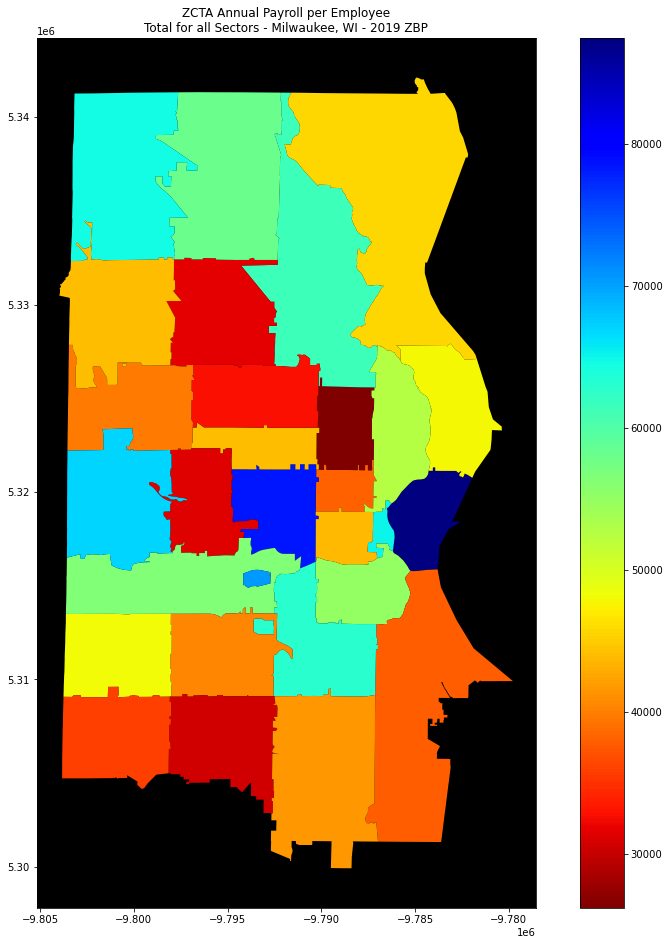

In [35]:
fig, ax = plt.subplots(figsize=(16,16))
mke_data = gpd.GeoDataFrame(mke_zbp_geo[["zcta", "NAICS2017", "EMP", "ESTAB", "PAYANN", "PAYQTR1", "geometry"]])
mke_data["EMP"] = mke_data["EMP"].astype(np.int64); mke_data["PAYANN"] = mke_data["PAYANN"].astype(np.int64)
mke_data["AP_PER_EMP"] = mke_data["PAYANN"] / mke_data["EMP"] * 1000.
mke_data["AP_PER_EMP"] = mke_data["AP_PER_EMP"].round(decimals=0)
mke_data[mke_data.NAICS2017=="00"].plot(ax=ax, legend=True, column = "AP_PER_EMP", cmap="jet_r")

ax.set_title("ZCTA Annual Payroll per Employee\nTotal for all Sectors - Milwaukee, WI - 2019 ZBP")
ax.set_facecolor("k")
plt.show()

#### American Community Survey (ACS) Data
The American Community Survey is the nation's most current, reliable, and accessible data source for local statistics on critical planning topics such as age, children, veterans, commuting, education, income, and employment. It surveys 3.5 million households and informs over \\$675 billion of Federal government spending each year. The ACS covers 35+ topics and supports over 300 evidence-based Federal government uses, and produces 11 billion estimates each year.

There are three key annual data releases:

* 1-year Estimates (for large populations; geographic areas with populations of 65,000+)
* 1-year Supplemental Estimates (for small populations; geographic areas with populations of 20,000+)
* 5-year Estimates (for very small populations; all geographic areas)

In short, the ACS is supposed to produce estimates of population characteristics on an annual basis to reflect a period of time.

Writing list of available APIs to an Excel Workbook. Good to have an idea of what is all available to us.

```python
# Ran once, change cell to code cell by clicking "ESC" key + "y" key if needed to be run again
cp.explorer.available().to_excel("CenPy Available APIs/census_api_services.xlsx")
```